In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Question 5
# Time interval between these 2 is 2.5s
# Real size of each pixel is 5x5cm
fr11 = cv2.imread('../CS4243_2023_images_small/fr11.png', 0)
fr12 = cv2.imread('../CS4243_2023_images_small/fr12.png', 0)

# function to keep the valid part after convolution 
def am_valid_part(a,N):
    cff = int(N/2)
    M = a.shape
    if len(M)==3:
        return a[cff:M[0]-cff, cff:M[1]-cff, :]
    else:
        return a[cff:M[0]-cff, cff:M[1]-cff]

def ready_2_show(a, level=255):
    a = ( a - np.min(a) ) / (np.max(a) - np.min(a)) 
    a = a * level
    return np.uint8(a)

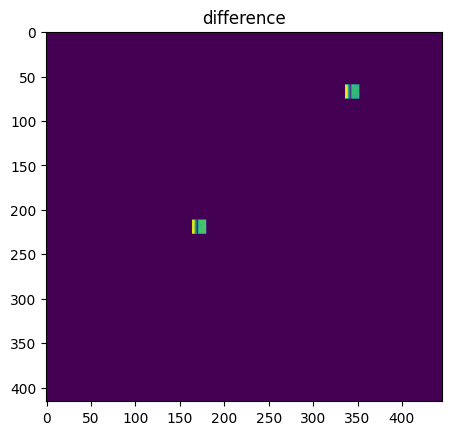

In [12]:
# computing the absolute difference between frames
diffp = (fr11*1.0 - fr12*1.0) 
diffp = abs( diffp )
# showing the results: absolute difference, suggests the motion
cv2.namedWindow("difference", cv2.WINDOW_NORMAL)
cv2.imshow('difference', diffp)

plt.title('difference')
plt.imshow(diffp)

maximum point on fr11: 335 58 	 on fr12: 163 210
velocity of the object is: 4.5907733553291425


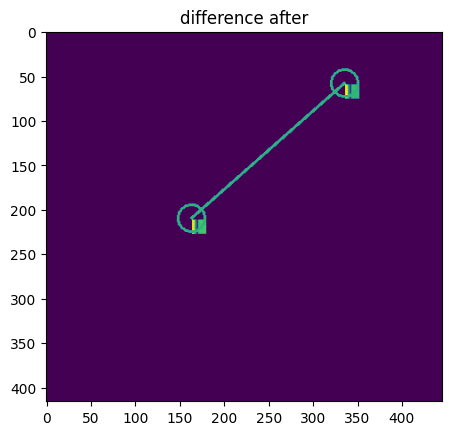

In [13]:
# Use 1st derivative vertical edge detector, sobel operator
hsy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
# edge images: Gy1 and Gy2 for frames image1 and image2
Gy1 = cv2.filter2D(src=fr11, ddepth=-1, kernel=hsy)
Gy2 = cv2.filter2D(src=fr12, ddepth=-1, kernel=hsy)
Gy1 = am_valid_part(Gy1,2)
Gy2 = am_valid_part(Gy2,2)
# using the absolute value of edge images
Gabs1 = (np.abs(Gy1))
Gabs2 = (np.abs(Gy2))

gmx2 = np.max(Gabs2)
M = Gabs1.shape
index = Gabs1.argmax()
y1, x1 = index//M[1], index%M[1]
index = Gabs2.argmax()
y2, x2 = index//M[1], index%M[1]

## where are the max points of the 2 frames? These are the interest points
print('maximum point on fr11:' ,x1,y1 ,'\t on fr12:' ,x2,y2)

velocity = np.sqrt(((x2-x1)*(5/100))**2 + ((y2-y1)*(5/100))**2 ) / 2.5       
print('velocity of the object is:', velocity)

## superimposing the motion on the first frame and the differential image
cv2.circle(fr11, (x1,y1), 15, 1, 2)
cv2.circle(fr11, (x2,y2), 15, 1, 2)
cv2.line(fr11, (x1,y1), (x2,y2), 1, 2)

cv2.circle(diffp, (x1,y1), 15, 100, 2)
cv2.circle(diffp, (x2,y2), 15, 100, 2)
cv2.line(diffp, (x1,y1), (x2,y2), 100, 2)

# showing the results: absolute difference, suggests the motion
cv2.namedWindow("difference after", cv2.WINDOW_NORMAL)
cv2.imshow('difference after', diffp)

plt.title('difference after')
plt.imshow(diffp)

#stdout:
# maximum point on fr11: 335 58 	 on fr12: 163 210 
# velocity of the object is: 4.5907733553291425